In [1]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid

%matplotlib inline

/Users/Andrew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
StepRate = np.zeros(31)
StepTime = np.arange(650,805,5) #for colorbar plotting
min_spreading_rate = np.full_like(StepRate, 20)
max_spreading_rate = np.full_like(StepRate, 70)

In [3]:
AUSMEX800_max = np.full_like(StepRate, 68)
AUSMEX800_mid = np.full_like(StepRate, 60)
AUSMEX800_min = np.full_like(StepRate, 55)
AUSMEX800_ave = np.full_like(StepRate, 61)

AUSMEX775_max = np.full_like(StepRate, 81)
AUSMEX775_max[-5:] = np.nan
AUSMEX775_mid = np.full_like(StepRate, 66)
AUSMEX775_mid[-5:] = np.nan
AUSMEX775_min = np.full_like(StepRate, 56)
AUSMEX775_min[-5:] = np.nan
AUSMEX775_ave = np.full_like(StepRate, 68)
AUSMEX775_ave[-5:] = np.nan

AUSMEX750_max = np.full_like(StepRate, 101)
AUSMEX750_max[-10:] = np.nan
AUSMEX750_mid = np.full_like(StepRate, 83)
AUSMEX750_mid[-10:] = np.nan
AUSMEX750_min = np.full_like(StepRate, 70)
AUSMEX750_min[-10:] = np.nan
AUSMEX750_ave = np.full_like(StepRate, 85)
AUSMEX750_ave[-10:] = np.nan

AUSMEX725_max = np.full_like(StepRate, 135)
AUSMEX725_max[-15:] = np.nan
AUSMEX725_mid = np.full_like(StepRate, 111)
AUSMEX725_mid[-15:] = np.nan
AUSMEX725_min = np.full_like(StepRate, 93)
AUSMEX725_min[-15:] = np.nan
AUSMEX725_ave = np.full_like(StepRate, 113)
AUSMEX725_ave[-15:] = np.nan

In [60]:
AUSWUS800_max = np.full_like(StepRate, 63)
AUSWUS800_mid = np.full_like(StepRate, 55)
AUSWUS800_min = np.full_like(StepRate, 48)
AUSWUS800_ave = np.full_like(StepRate, 55)

AUSWUS775_max = np.full_like(StepRate, 87)
AUSWUS775_max[-5:] = np.nan
AUSWUS775_mid = np.full_like(StepRate, 76)
AUSWUS775_mid[-5:] = np.nan
AUSWUS775_min = np.full_like(StepRate, 61)
AUSWUS775_min[-5:] = np.nan
AUSWUS775_ave = np.full_like(StepRate, 74)
AUSWUS775_ave[-5:] = np.nan

AUSWUS750_max = np.full_like(StepRate, 109)
AUSWUS750_max[-10:] = np.nan
AUSWUS750_mid = np.full_like(StepRate, 95)
AUSWUS750_mid[-10:] = np.nan
AUSWUS750_min = np.full_like(StepRate, 77)
AUSWUS750_min[-10:] = np.nan
AUSWUS750_ave = np.full_like(StepRate, 93)
AUSWUS750_ave[-10:] = np.nan

AUSWUS725_max = np.full_like(StepRate, 145)
AUSWUS725_max[-15:] = np.nan
AUSWUS725_mid = np.full_like(StepRate, 126)
AUSWUS725_mid[-15:] = np.nan
AUSWUS725_min = np.full_like(StepRate, 102)
AUSWUS725_min[-15:] = np.nan
AUSWUS725_ave = np.full_like(StepRate, 124)
AUSWUS725_ave[-15:] = np.nan

In [61]:
SWEAT800_max = np.full_like(StepRate, 85)
SWEAT800_mid = np.full_like(StepRate, 77)
SWEAT800_min = np.full_like(StepRate, 61)
SWEAT800_ave = np.full_like(StepRate, 74)

SWEAT775_max = np.full_like(StepRate, 102)
SWEAT775_max[-5:] = np.nan
SWEAT775_mid = np.full_like(StepRate, 92)
SWEAT775_mid[-5:] = np.nan
SWEAT775_min = np.full_like(StepRate, 73)
SWEAT775_min[-5:] = np.nan
SWEAT775_ave = np.full_like(StepRate, 89)
SWEAT775_ave[-5:] = np.nan

SWEAT750_max = np.full_like(StepRate, 128)
SWEAT750_max[-10:] = np.nan
SWEAT750_mid = np.full_like(StepRate, 115)
SWEAT750_mid[-10:] = np.nan
SWEAT750_min = np.full_like(StepRate, 91)
SWEAT750_min[-10:] = np.nan
SWEAT750_ave = np.full_like(StepRate, 111)
SWEAT750_ave[-10:] = np.nan

SWEAT725_max = np.full_like(StepRate, 170)
SWEAT725_max[-15:] = np.nan
SWEAT725_mid = np.full_like(StepRate, 154)
SWEAT725_mid[-15:] = np.nan
SWEAT725_min = np.full_like(StepRate, 121)
SWEAT725_min[-15:] = np.nan
SWEAT725_ave = np.full_like(StepRate, 148)
SWEAT725_ave[-15:] = np.nan

In [62]:
empty_775_nans = np.empty(10,)
empty_775_nans[:] = np.nan

empty_750_nans = np.empty(20,)
empty_750_nans[:] = np.nan

empty_725_nans = np.empty(30,)
empty_725_nans[:] = np.nan

In [63]:
Missing_Link_rate_800 = np.asarray([205.49103971,  205.49103971,  202.51857781,  202.51857781,
        199.13728552,  199.13728552,  156.66446426,  156.66446426,
        157.29648956,  157.29648956,  157.31710513,  157.31710513,
        156.78691392,  156.78691392,  155.77664286,  155.77664286,
        154.36666625,  154.36666625,  152.64617642,  152.64617642,
         58.44695194,   58.44695194,   55.9979816 ,   55.9979816 ,
         53.49865692,   53.49865692,   50.95276436,   50.95276436,
         48.36458847,   48.36458847,   45.73905378,   45.73905378,
         43.08194743,   43.08194743,   40.40028347,   40.40028347,
         37.70293371,   37.70293371,   35.00179748,   35.00179748,
         15.44315382,   15.44315382,   17.6336597 ,   17.6336597 ,
         15.23950618,   15.23950618,   13.45773405,   13.45773405,
         13.22776935,   13.22776935,   13.66455975,   13.66455975,
        112.97247042,  112.97247042,  112.89959069,  112.89959069,
        112.82476473,  112.82476473,  112.74850325,  112.74850325])

Missing_Link_rate_775 = np.asarray([203.09446631,  203.09446631,  199.77783622,  199.77783622,
        196.05961327,  196.05961327,  167.86399729,  167.86399729,
        166.97076082,  166.97076082,  165.01196096,  165.01196096,
        162.08967628,  162.08967628,  158.33221291,  158.33221291,
        153.8956308 ,  153.8956308 ,  148.9650132 ,  148.9650132 ,
         72.73105371,   72.73105371,   69.19698638,   69.19698638,
         65.65905942,   65.65905942,   62.14393575,   62.14393575,
         58.68462841,   58.68462841,   67.01850248,   67.01850248,
         65.36862548,   65.36862548,   63.68228212,   63.68228212,
         61.96460523,   61.96460523,   60.2212672 ,   60.2212672 ,
         28.65127479,   28.65127479,   14.30939628,   14.30939628,
         14.38349505,   14.38349505,   14.96018136,   14.96018136,
         15.89365297,   15.89365297])
Missing_Link_rate_775 = np.hstack((Missing_Link_rate_775, empty_775_nans))

Missing_Link_rate_750 = np.asarray([ 249.69065404,  249.69065404,  248.01100421,  248.01100421,
        246.21011412,  246.21011412,  131.66887117,  131.66887117,
        131.86329633,  131.86329633,  131.56622685,  131.56622685,
        130.82449827,  130.82449827,  129.69535687,  129.69535687,
        128.24595639,  128.24595639,  126.55256545,  126.55256545,
         50.80958386,   50.80958386,   48.9085925 ,   48.9085925 ,
         47.01303394,   47.01303394,   45.13491427,   45.13491427,
        115.07018381,  115.07018381,  111.4779046 ,  111.4779046 ,
         81.3128551 ,   81.3128551 ,   75.36824656,   75.36824656,
         69.7137282 ,   69.7137282 ,   64.53017347,   64.53017347])
Missing_Link_rate_750 = np.hstack((Missing_Link_rate_750, empty_750_nans))

Missing_Link_rate_725 = np.asarray([197.83578552,  197.83578552,  193.93809262,  193.93809262,
        189.66134093,  189.66134093,  213.77457196,  213.77457196,
        206.73371451,  206.73371451,  197.24196818,  197.24196818,
        185.41716981,  185.41716981,  171.47360317,  171.47360317,
        155.74200112,  155.74200112,  138.71083472,  138.71083472,
         87.41419997,   87.41419997,   83.98977393,   83.98977393,
         80.49859353,   80.49859353,   76.9484805 ,   76.9484805 ,
         73.34841852,   73.34841852])
Missing_Link_rate_725 = np.hstack((Missing_Link_rate_725, empty_725_nans))

In [64]:
title_font_size = 35
ticks_font_size = 25
axis_font_size = 30

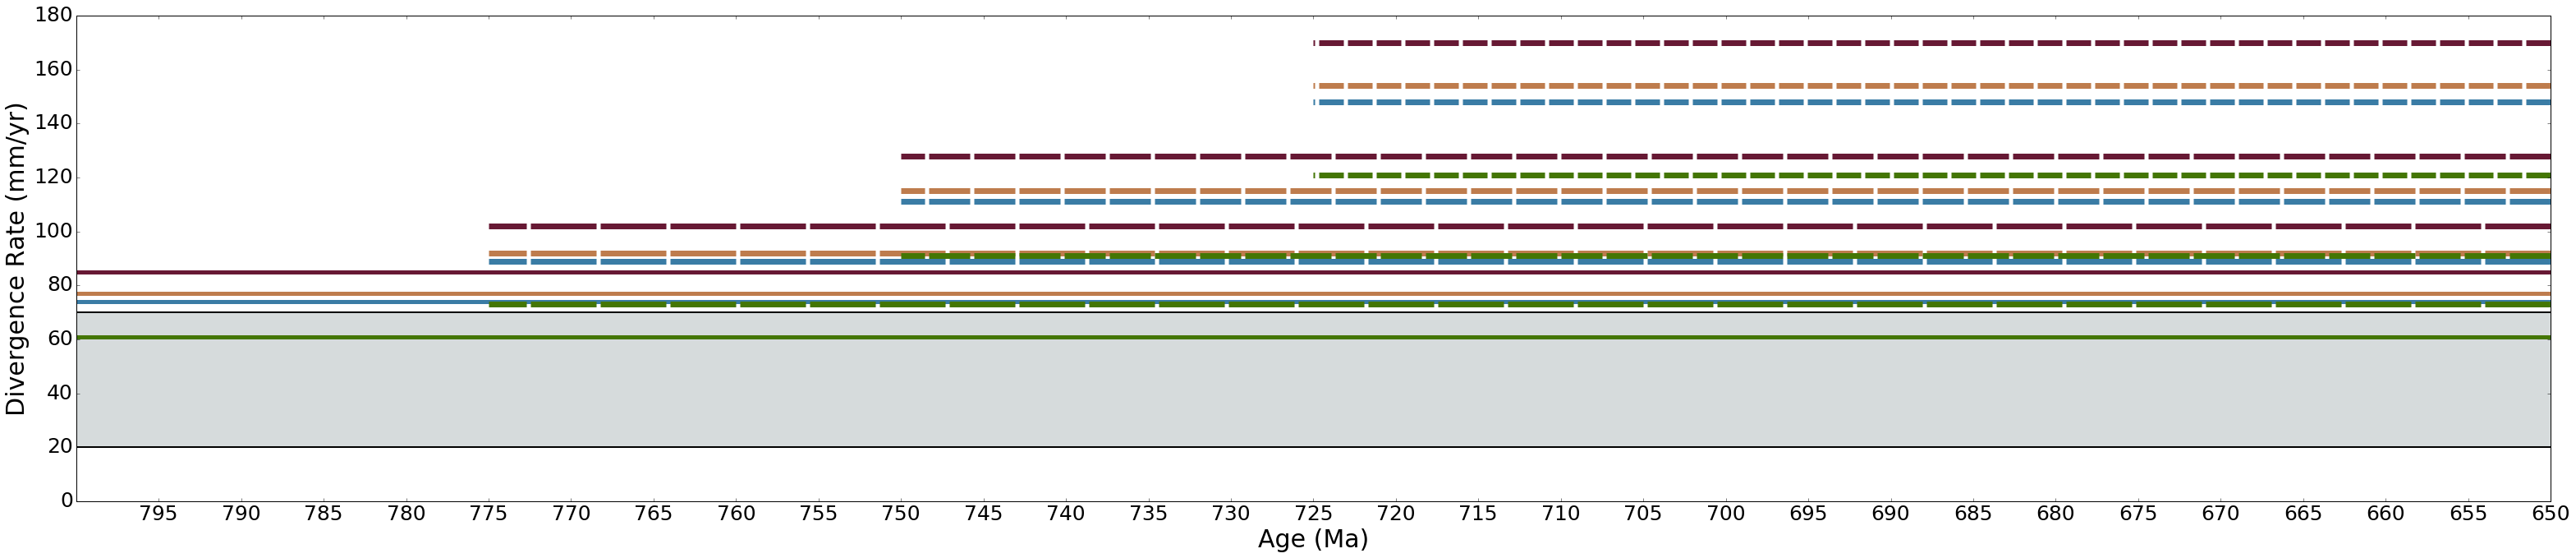

In [65]:
fig = plt.figure(figsize=(36*1.5,24*1.5),dpi=300)

plt.subplot(311)#, axisbg=('#FFF9F6'))
plt.plot(StepTime,min_spreading_rate,linewidth=2,c='k')
plt.plot(StepTime,max_spreading_rate,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.plot(StepTime,SWEAT800_max,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,SWEAT800_mid,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,SWEAT800_min,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,SWEAT800_ave,linewidth=5, ls='-', c='#3A7CA5')

plt.plot(StepTime,SWEAT775_max,linewidth=7, ls=':', c='#671934', dashes=[80,5,80,5])
plt.plot(StepTime,SWEAT775_mid,linewidth=7, ls=':', c='#BE7C4D', dashes=[80,5,80,5])
plt.plot(StepTime,SWEAT775_min,linewidth=7, ls=':', c='#447604', dashes=[80,5,80,5])
plt.plot(StepTime,SWEAT775_ave,linewidth=7, ls=':', c='#3A7CA5', dashes=[80,5,80,5])

plt.plot(StepTime,SWEAT750_max,linewidth=7, ls='--', c='#671934', dashes=[50,5,50,5])
plt.plot(StepTime,SWEAT750_mid,linewidth=7, ls='--', c='#BE7C4D', dashes=[50,5,50,5])
plt.plot(StepTime,SWEAT750_min,linewidth=7, ls='--', c='#447604', dashes=[50,5,50,5])
plt.plot(StepTime,SWEAT750_ave,linewidth=7, ls='--', c='#3A7CA5', dashes=[50,5,50,5])


plt.plot(StepTime,SWEAT725_max,linewidth=7, ls='-.', c='#671934', dashes=[30,5,30,5])
plt.plot(StepTime,SWEAT725_mid,linewidth=7, ls='-.', c='#BE7C4D', dashes=[30,5,30,5])
plt.plot(StepTime,SWEAT725_min,linewidth=7, ls='-.', c='#447604', dashes=[30,5,30,5])
plt.plot(StepTime,SWEAT725_ave,linewidth=7, ls='-.', c='#3A7CA5', dashes=[30,5,30,5])

plt.plot()
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(0,180)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'SWEAT_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)


In [66]:
StepTime_direc = np.arange(650,805,5)

In [67]:
StepTime_direc

array([650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
       780, 785, 790, 795, 800])

In [68]:
#StepTime_direc = ([ 650.,  655.,  655.,  660.,  660.,  665.,  665.,  670.,  670.,
#        675.,  675.,  680.,  680.,  685.,  685.,  690.,  690.,  695.,
#        695.,  700.,  700.,  705.,  705.,  710.,  710.,  715.,  715.,
#        720.,  720.,  725.,  725.,  730.,  730.,  735.,  735.,  740.,
#        740.,  745.,  745.,  750.,  750.,  755.,  755.,  760.,  760.,
#        765.,  765.,  770.,  770.,  775.,  775.,  780.,  780.,  785.,
#        785.,  790.,  790.,  795.,  795.,  800.])

In [69]:
AUSMEX_direc_800 = np.asarray([299.36692175,  299.36692175,  297.19157552,  297.19157552,
        294.98159445,  294.98159445,  292.73845388,  292.73845388,
        290.46397629,  290.46397629,  288.160333  ,  288.160333  ,
        285.83003803,  285.83003803,  283.47593336,  283.47593336,
        281.10116521,  281.10116521,  278.70915142,  278.70915142,
        276.30354042,  276.30354042,  273.88816286,  273.88816286,
        271.4669773 ,  271.4669773 ,  269.04401194,  269.04401194,
        266.62330441,  266.62330441,  264.2088418 ,  264.2088418 ,
        261.80450323,  261.80450323,  259.41400672,  259.41400672,
        257.04086209,  257.04086209,  254.68833111,  254.68833111,
        252.35939567,  252.35939567,  250.05673414,  250.05673414,
        247.78270608,  247.78270608,  245.53934456,  245.53934456,
        243.32835568,  243.32835568,  241.15112407,  241.15112407,
        239.00872366,  239.00872366,  236.90193246,  236.90193246,
        234.83125056,  234.83125056,  232.79692012,  232.79692012])

AUSMEX_direc_775 = np.asarray([302.97262532,  302.97262532,  300.59048574,  300.59048574,
        298.18501501,  298.18501501,  295.75699373,  295.75699373,
        293.30741929,  293.30741929,  290.83750525,  290.83750525,
        288.34867741,  288.34867741,  285.8425662 ,  285.8425662 ,
        283.3209953 ,  283.3209953 ,  280.78596636,  280.78596636,
        278.23963991,  278.23963991,  275.68431278,  275.68431278,
        273.12239226,  273.12239226,  270.55636765,  270.55636765,
        267.98877976,  267.98877976,  265.42218912,  265.42218912,
        262.85914368,  262.85914368,  260.3021468 ,  260.3021468 ,
        257.75362648,  257.75362648,  255.2159063 ,  255.2159063 ,
        252.69117903,  252.69117903,  250.18148325,  250.18148325,
        247.68868345,  247.68868345,  245.21445396,  245.21445396,
        242.76026665,  242.76026665])
AUSMEX_direc_775 = np.hstack((AUSMEX_direc_775, empty_775_nans))

AUSMEX_direc_750 = np.asarray([299.37040643,  299.37040643,  296.15588206,  296.15588206,
        292.87790575,  292.87790575,  289.54167945,  289.54167945,
        286.1538372 ,  286.1538372 ,  282.72236662,  282.72236662,
        279.25644961,  279.25644961,  275.76622501,  275.76622501,
        272.26248588,  272.26248588,  268.75633324,  268.75633324,
        265.25881393,  265.25881393,  261.78057213,  261.78057213,
        258.33154094,  258.33154094,  254.92069364,  254.92069364,
        251.55586548,  251.55586548,  248.24364781,  248.24364781,
        244.98934907,  244.98934907,  241.79701198,  241.79701198,
        238.66947412,  238.66947412,  235.60845863,  235.60845863])
AUSMEX_direc_750 = np.hstack((AUSMEX_direc_750, empty_750_nans))

AUSMEX_direc_725 = np.asarray([299.00137205,  299.00137205,  294.70076284,  294.70076284,
        290.29026384,  290.29026384,  285.78390522,  285.78390522,
        281.20007578,  281.20007578,  276.56090964,  276.56090964,
        271.89124481,  271.89124481,  267.21725904,  267.21725904,
        262.56496552,  262.56496552,  257.95878187,  257.95878187,
        253.42035763,  253.42035763,  248.96777382,  248.96777382,
        244.61514122,  244.61514122,  240.37255248,  240.37255248,
        236.24630193,  236.24630193])
AUSMEX_direc_725 = np.hstack((AUSMEX_direc_725, empty_725_nans))

In [70]:
AUSMEX_direc_800

array([ 299.36692175,  299.36692175,  297.19157552,  297.19157552,
        294.98159445,  294.98159445,  292.73845388,  292.73845388,
        290.46397629,  290.46397629,  288.160333  ,  288.160333  ,
        285.83003803,  285.83003803,  283.47593336,  283.47593336,
        281.10116521,  281.10116521,  278.70915142,  278.70915142,
        276.30354042,  276.30354042,  273.88816286,  273.88816286,
        271.4669773 ,  271.4669773 ,  269.04401194,  269.04401194,
        266.62330441,  266.62330441,  264.2088418 ,  264.2088418 ,
        261.80450323,  261.80450323,  259.41400672,  259.41400672,
        257.04086209,  257.04086209,  254.68833111,  254.68833111,
        252.35939567,  252.35939567,  250.05673414,  250.05673414,
        247.78270608,  247.78270608,  245.53934456,  245.53934456,
        243.32835568,  243.32835568,  241.15112407,  241.15112407,
        239.00872366,  239.00872366,  236.90193246,  236.90193246,
        234.83125056,  234.83125056,  232.79692012,  232.79692

In [90]:
AUSMEX_direc_800_trim = np.hstack((AUSMEX_direc_800[0],AUSMEX_direc_800[0::2]))
AUSMEX_direc_775_trim = np.hstack((AUSMEX_direc_775[0],AUSMEX_direc_775[0::2]))
AUSMEX_direc_750_trim = np.hstack((AUSMEX_direc_750[0],AUSMEX_direc_750[0::2]))
AUSMEX_direc_725_trim = np.hstack((AUSMEX_direc_725[0],AUSMEX_direc_725[0::2]))

In [73]:
AUSWUS_direc_800 = np.asarray([292.28082151,  292.28082151,  290.11780696,  290.11780696,
        287.934242  ,  287.934242  ,  285.73183739,  285.73183739,
        283.51249659,  283.51249659,  281.27830213,  281.27830213,
        279.03149793,  279.03149793,  276.77446771,  276.77446771,
        274.50970986,  274.50970986,  272.23980941,  272.23980941,
        269.96740772,  269.96740772,  267.6951708 ,  267.6951708 ,
        265.42575704,  265.42575704,  263.16178533,  263.16178533,
        260.90580452,  260.90580452,  258.66026485,  258.66026485,
        256.42749226,  256.42749226,  254.20966597,  254.20966597,
        252.00879979,  252.00879979,  249.82672732,  249.82672732,
        247.6650912 ,  247.6650912 ,  245.52533612,  245.52533612,
        243.40870561,  243.40870561,  241.31624208,  241.31624208,
        239.24878978,  239.24878978,  237.20700034,  237.20700034,
        235.19134029,  235.19134029,  233.20210026,  233.20210026,
        231.23940532,  231.23940532,  229.30322612,  229.30322612])

AUSWUS_direc_775 = np.asarray([294.40020913,  294.40020913,  291.70205303,  291.70205303,
        288.95280813,  288.95280813,  286.15594706,  286.15594706,
        283.31579294,  283.31579294,  280.4375184 ,  280.4375184 ,
        277.52711189,  277.52711189,  274.59130695,  274.59130695,
        271.63747293,  271.63747293,  268.67346846,  268.67346846,
        265.70746318,  265.70746318,  262.74773687,  262.74773687,
        259.80246791,  259.80246791,  256.87952487,  256.87952487,
        253.98627494,  253.98627494,  251.12942081,  251.12942081,
        248.31487471,  248.31487471,  245.54767408,  245.54767408,
        242.83193929,  242.83193929,  240.17087019,  240.17087019,
        237.56677576,  237.56677576,  235.02112943,  235.02112943,
        232.53464257,  232.53464257,  230.10734869,  230.10734869,
        227.7386921 ,  227.7386921 ])
AUSWUS_direc_775 = np.hstack((AUSWUS_direc_775, empty_775_nans))

AUSWUS_direc_750 = np.asarray([294.19106929,  294.19106929,  290.81027027,  290.81027027,
        287.35093965,  287.35093965,  283.8204818 ,  283.8204818 ,
        280.22837857,  280.22837857,  276.58612391,  276.58612391,
        272.90702209,  272.90702209,  269.20583993,  269.20583993,
        265.49832334,  265.49832334,  261.8006102 ,  261.8006102 ,
        258.12859153,  258.12859153,  254.49728462,  254.49728462,
        250.92028098,  250.92028098,  247.4093193 ,  247.4093193 ,
        243.97401225,  243.97401225,  240.62173167,  240.62173167,
        237.35763592,  237.35763592,  234.18480946,  234.18480946,
        231.10447864,  231.10447864,  228.1162692 ,  228.1162692])
AUSWUS_direc_750 = np.hstack((AUSWUS_direc_750, empty_750_nans))

AUSWUS_direc_725 = np.asarray([293.84243911,  293.84243911,  289.31693261,  289.31693261,
        284.6560312 ,  284.6560312 ,  279.87974839,  279.87974839,
        275.01451735,  275.01451735,  270.09243258,  270.09243258,
        265.14969316,  265.14969316,  260.22435355,  260.22435355,
        255.35369292,  255.35369292,  250.5716508 ,  250.5716508 ,
        245.90677026,  245.90677026,  241.38094036,  241.38094036,
        237.00900574,  237.00900574,  232.79911318,  232.79911318,
        228.75355393,  228.75355393])
AUSWUS_direc_725 = np.hstack((AUSWUS_direc_725, empty_725_nans))

In [96]:
AUSWUS_direc_800_trim = np.hstack((AUSWUS_direc_800[0],AUSWUS_direc_800[0::2]))
AUSWUS_direc_775_trim = np.hstack((AUSWUS_direc_775[0],AUSWUS_direc_775[0::2]))
AUSWUS_direc_750_trim = np.hstack((AUSWUS_direc_750[0],AUSWUS_direc_750[0::2]))
AUSWUS_direc_725_trim = np.hstack((AUSWUS_direc_725[0],AUSWUS_direc_725[0::2]))
#StepDirec = StepDirec[0::2]

In [97]:
SWEAT_direc_800 = np.asarray([283.86694259,  283.86694259,  281.35237599,  281.35237599,
        278.80212276,  278.80212276,  276.22079515,  276.22079515,
        273.61363232,  273.61363232,  270.9864458 ,  270.9864458 ,
        268.34553709,  268.34553709,  265.69758833,  265.69758833,
        263.04952949,  263.04952949,  260.40838804,  260.40838804,
        257.7811291 ,  257.7811291 ,  255.17449536,  255.17449536,
        252.59485648,  252.59485648,  250.0480766 ,  250.0480766 ,
        247.53940701,  247.53940701,  245.07340824,  245.07340824,
        242.65390336,  242.65390336,  240.28396141,  240.28396141,
        237.96590796,  237.96590796,  235.70135807,  235.70135807,
        233.49126654,  233.49126654,  231.33598976,  231.33598976,
        229.23535444,  229.23535444,  227.18872857,  227.18872857,
        225.19509146,  225.19509146,  223.25310012,  223.25310012,
        221.36115031,  221.36115031,  219.51743132,  219.51743132,
        217.71997397,  217.71997397,  215.9666918 ,  215.9666918 ])

SWEAT_direc_775 = np.asarray([283.73083551,  283.73083551,  280.70893494,  280.70893494,
        277.63693375,  277.63693375,  274.52313065,  274.52313065,
        271.3770817 ,  271.3770817 ,  268.20943001,  268.20943001,
        265.03165382,  265.03165382,  261.85574256,  261.85574256,
        258.69382136,  258.69382136,  255.55775277,  255.55775277,
        252.4587494 ,  252.4587494 ,  249.40703051,  249.40703051,
        246.411549  ,  246.411549  ,  243.47980566,  243.47980566,
        240.61775556,  240.61775556,  237.82980088,  237.82980088,
        235.11885642,  235.11885642,  232.48646958,  232.48646958,
        229.93297552,  229.93297552,  227.45766985,  227.45766985,
        225.05898438,  225.05898438,  222.73465505,  222.73465505,
        220.48187513,  220.48187513,  218.29742978,  218.29742978,
        216.17781031,  216.17781031])
SWEAT_direc_775 = np.hstack((SWEAT_direc_775, empty_775_nans))

SWEAT_direc_750 = np.asarray([283.52664906,  283.52664906,  279.74114355,  279.74114355,
        275.88050161,  275.88050161,  271.96186497,  271.96186497,
        268.00524356,  268.00524356,  264.03284035,  264.03284035,
        260.06809451,  260.06809451,  256.13453204,  256.13453204,
        252.25456294,  252.25456294,  248.44838256,  248.44838256,
        244.73311471,  244.73311471,  241.122281  ,  241.122281  ,
        237.62561442,  237.62561442,  234.24917596,  234.24917596,
        230.99569623,  230.99569623,  227.86505227,  227.86505227,
        224.85479792,  224.85479792,  221.96068541,  221.96068541,
        219.17713779,  219.17713779,  216.49765144,  216.49765144])
SWEAT_direc_750 = np.hstack((SWEAT_direc_750, empty_750_nans))

SWEAT_direc_725 = np.asarray([283.19311369,  283.19311369,  278.12804582,  278.12804582,
        272.93922972,  272.93922972,  267.67073269,  267.67073269,
        262.37425561,  262.37425561,  257.10533332,  257.10533332,
        251.9185064 ,  251.9185064 ,  246.86249205,  246.86249205,
        241.97643324,  241.97643324,  237.28790874,  237.28790874,
        232.81277556,  232.81277556,  228.55641526,  228.55641526,
        224.51574973,  224.51574973,  220.68145077,  220.68145077,
        217.03995857,  217.03995857])
SWEAT_direc_725 = np.hstack((SWEAT_direc_725, empty_725_nans))

In [98]:
SWEAT_direc_800_trim = np.hstack((SWEAT_direc_800[0],SWEAT_direc_800[0::2]))
SWEAT_direc_775_trim = np.hstack((SWEAT_direc_775[0],SWEAT_direc_775[0::2]))
SWEAT_direc_750_trim = np.hstack((SWEAT_direc_750[0],SWEAT_direc_750[0::2]))
SWEAT_direc_725_trim = np.hstack((SWEAT_direc_725[0],SWEAT_direc_725[0::2]))
#StepDirec = StepDirec[0::2]

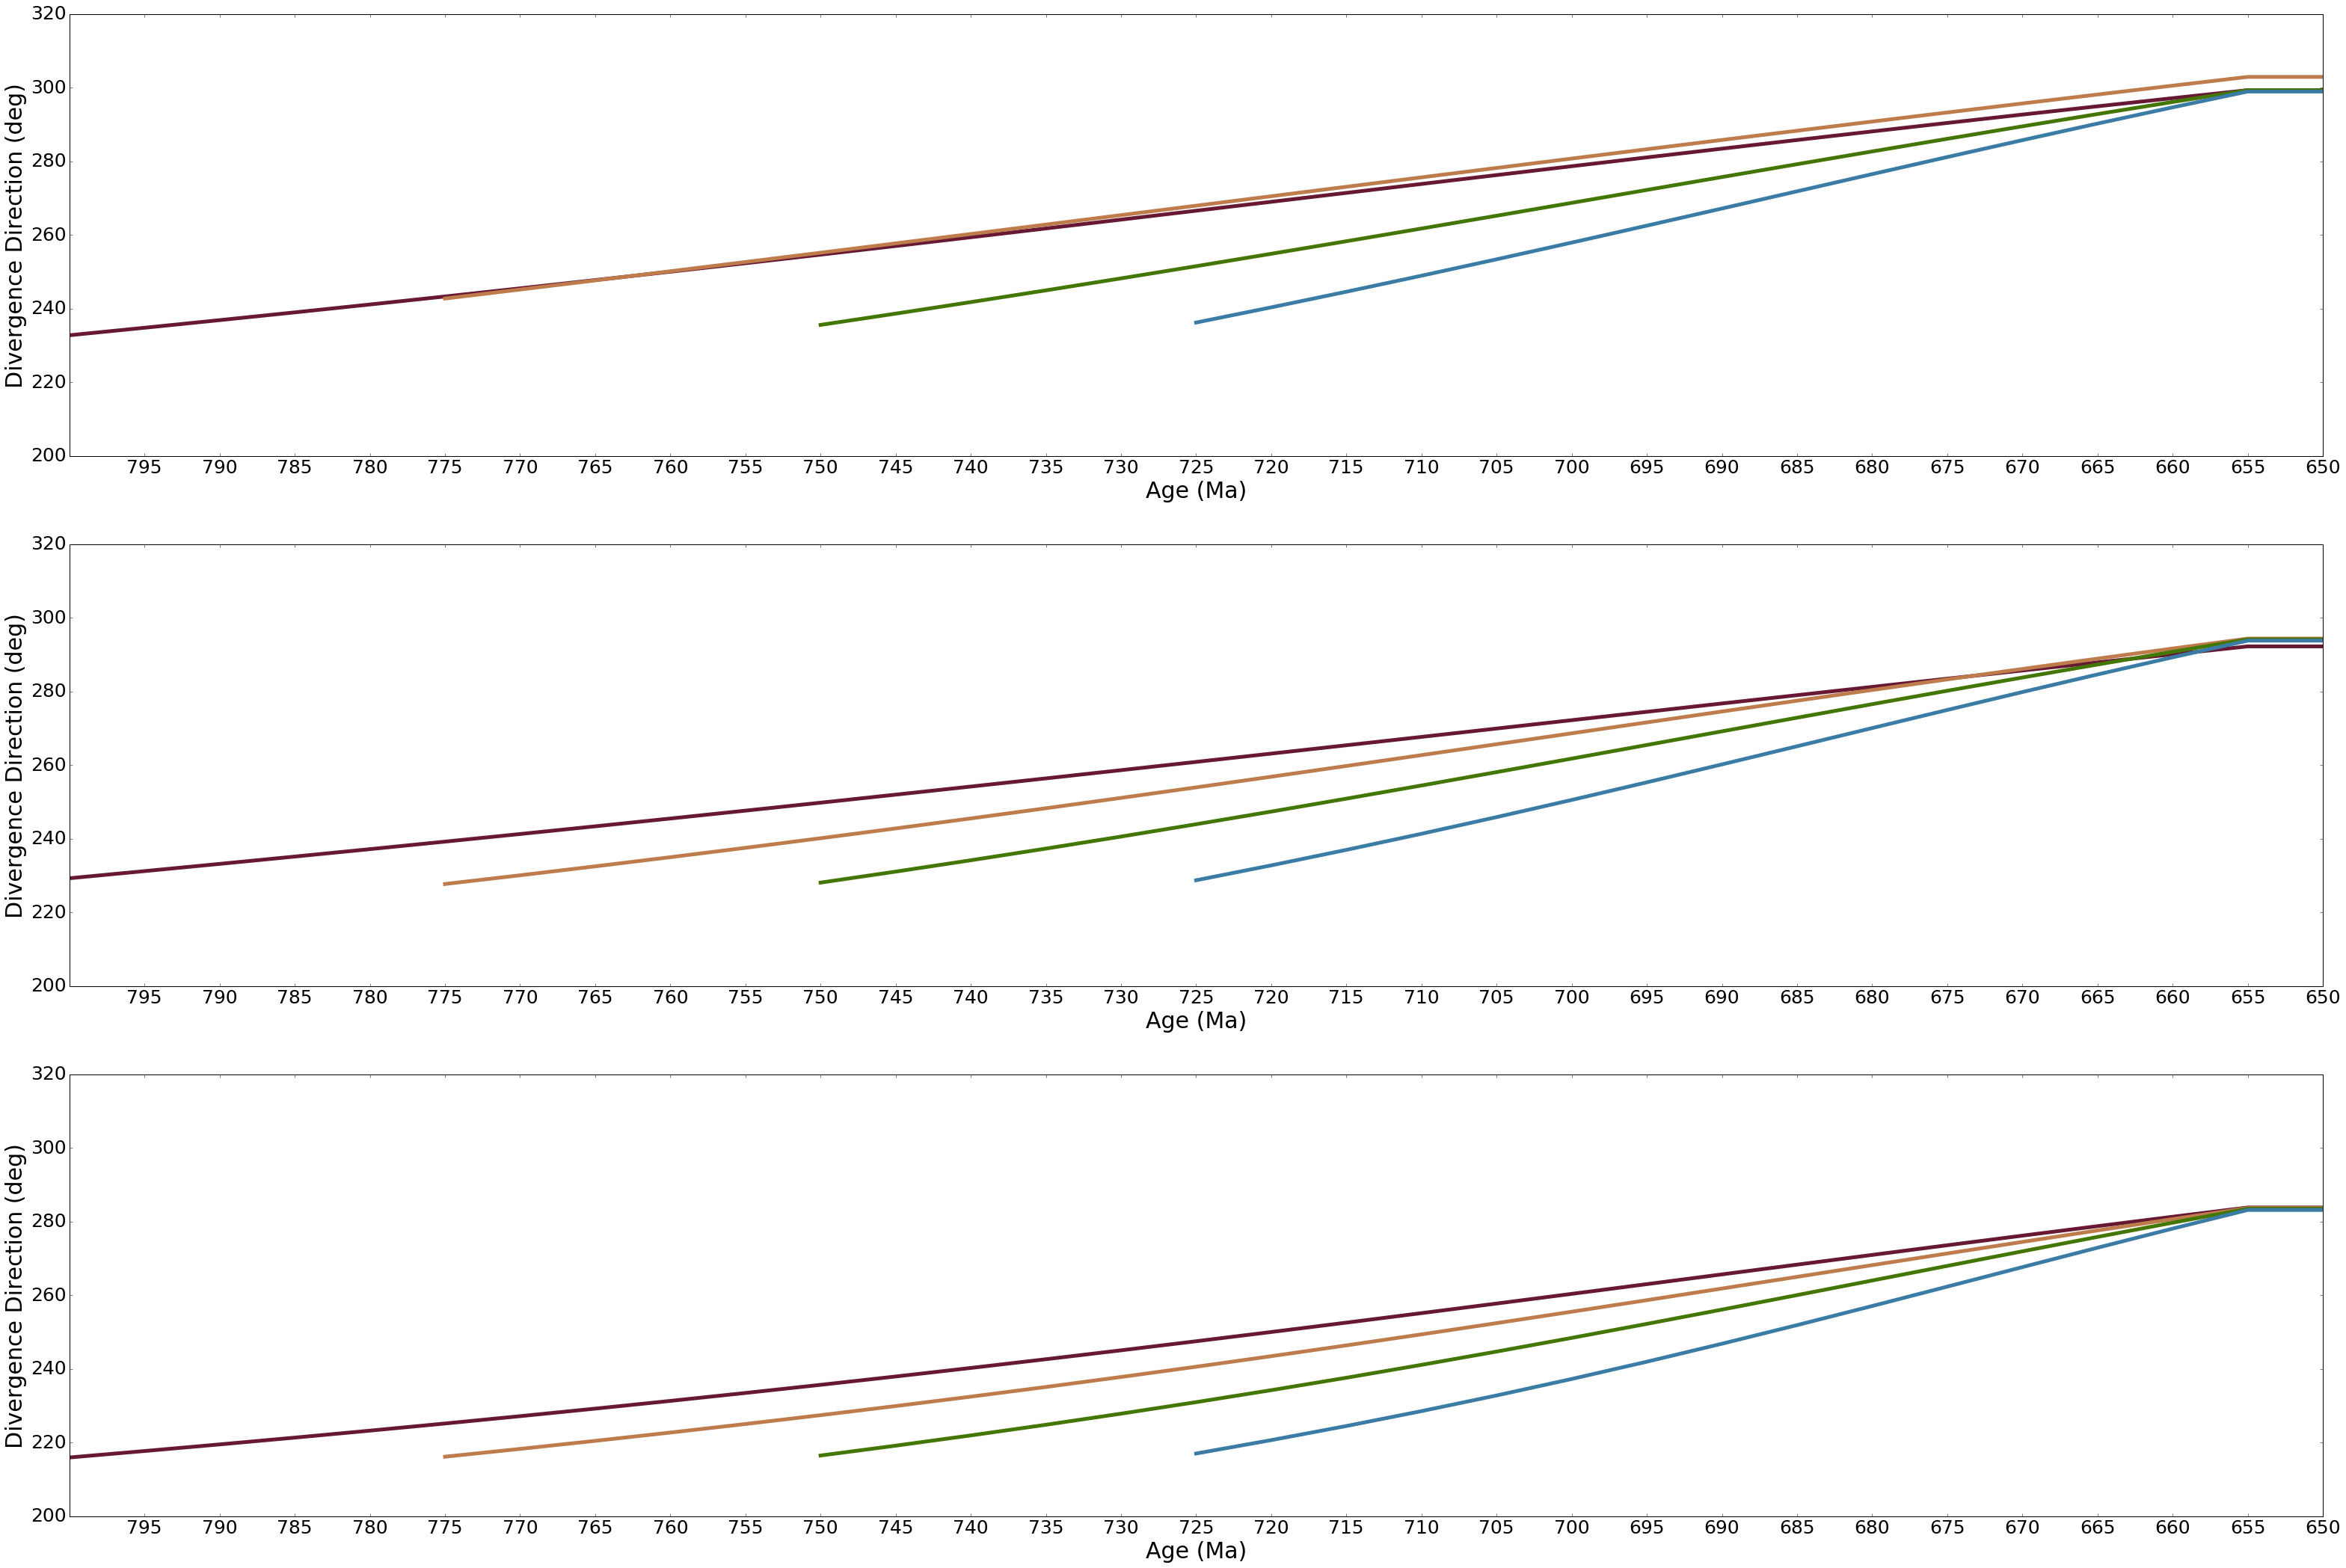

In [100]:
fig = plt.figure(figsize=(36*1.5,24*1.5),dpi=300)

plt.subplot(311)

plt.plot(StepTime_direc,AUSMEX_direc_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime_direc,AUSMEX_direc_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime_direc,AUSMEX_direc_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime_direc,AUSMEX_direc_725_trim,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(312)

plt.plot(StepTime_direc,AUSWUS_direc_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime_direc,AUSWUS_direc_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime_direc,AUSWUS_direc_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime_direc,AUSWUS_direc_725_trim,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(313)

plt.plot(StepTime_direc,SWEAT_direc_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime_direc,SWEAT_direc_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime_direc,SWEAT_direc_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime_direc,SWEAT_direc_725_trim,linewidth=5, ls='-', c='#3A7CA5')


plt.subplot(311)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

plt.subplot(312)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

plt.subplot(313)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)


fname = 'MOR_Orientation.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)


In [94]:
len(StepTime_direc)

31

In [92]:
len(AUSMEX_direc_800_trim)

31

In [ ]:
™